<center><b><u>METADATA</u></b></center>


<li><b>Product type:</b>
Monthly averaged reanalysis by hour of day

<li><b>Variable:</b>
10m wind speed, 2m temperature, Boundary layer height, Surface net solar radiation

<li><b>Year:</b>
2020, 2021, 2022, 2023

<li><b>Month:</b>
January, February, March, April, May, June, July, August, September, October, November, December

<li><b>Time:</b>
06:00, 09:00, 12:00, 15:00, 18:00

<li><b>Whole available region:</b>
World Data

<li><b>Format:</b>
NetCDF (experimental)

# IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

# READING THE netCDF DATA

In [2]:
data = xr.open_dataset('C:/Users/ROBB STARK/Desktop/Python Project/Project For CV/Project Data/Boundary Layer Data.nc')
data

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 288)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2020-01-01T06:00:00 ... 2023-12-01T18:00:00
Data variables:
    si10       (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    blh        (time, latitude, longitude) float32 ...
    ssr        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-05 00:44:17 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

# Selecting the Data Variable

In [3]:
# selecting the 2m temperature from the data read
selected_temp_data = data['t2m']
selected_temp_data

<xarray.DataArray 't2m' (time: 288, latitude: 721, longitude: 1440)>
[299013120 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2020-01-01T06:00:00 ... 2023-12-01T18:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

# Grouping by year and Finding the mean of the data

In [4]:
celcuis_temp_year=selected_temp_data.groupby('time.year').mean()-273
celcuis_temp_year

<xarray.DataArray 't2m' (year: 4, latitude: 721, longitude: 1440)>
array([[[-12.268921 , -12.268921 , -12.268921 , ..., -12.268921 ,
         -12.268921 , -12.268921 ],
        [-12.315247 , -12.314423 , -12.313538 , ..., -12.317535 ,
         -12.316742 , -12.315857 ],
        [-12.3211975, -12.319672 , -12.318115 , ..., -12.325958 ,
         -12.324463 , -12.322815 ],
        ...,
        [-44.08644  , -44.08548  , -44.083786 , ..., -44.08943  ,
         -44.087906 , -44.086716 ],
        [-44.143173 , -44.14186  , -44.140656 , ..., -44.145523 ,
         -44.144714 , -44.143982 ],
        [-44.565384 , -44.565384 , -44.565384 , ..., -44.565384 ,
         -44.565384 , -44.565384 ]],

       [[-13.181427 , -13.181427 , -13.181427 , ..., -13.181427 ,
         -13.181427 , -13.181427 ],
        [-13.053772 , -13.053589 , -13.053406 , ..., -13.054413 ,
         -13.054138 , -13.054047 ],
        [-12.928528 , -12.928101 , -12.92746  , ..., -12.930542 ,
         -12.929962 , -12.92926  ],
...
        [-45.265915 , -45.264816 , -45.262604 , ..., -45.26935  ,
         -45.267624 , -45.26645  ],
        [-45.311966 , -45.310623 , -45.309143 , ..., -45.31462  ,
         -45.313812 , -45.312973 ],
        [-45.75711  , -45.75711  , -45.75711  , ..., -45.75711  ,
         -45.75711  , -45.75711  ]],

       [[-13.330139 , -13.330139 , -13.330139 , ..., -13.330139 ,
         -13.330139 , -13.330139 ],
        [-13.301971 , -13.301941 , -13.302002 , ..., -13.301758 ,
         -13.301819 , -13.302032 ],
        [-13.249878 , -13.2499695, -13.250122 , ..., -13.249847 ,
         -13.249847 , -13.249878 ],
        ...,
        [-44.149628 , -44.149628 , -44.148697 , ..., -44.149597 ,
         -44.149094 , -44.149155 ],
        [-44.125946 , -44.12526  , -44.12433  , ..., -44.126465 ,
         -44.12628  , -44.126205 ],
        [-44.563126 , -44.563126 , -44.563126 , ..., -44.563126 ,
         -44.563126 , -44.563126 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * year       (year) int64 2020 2021 2022 2023

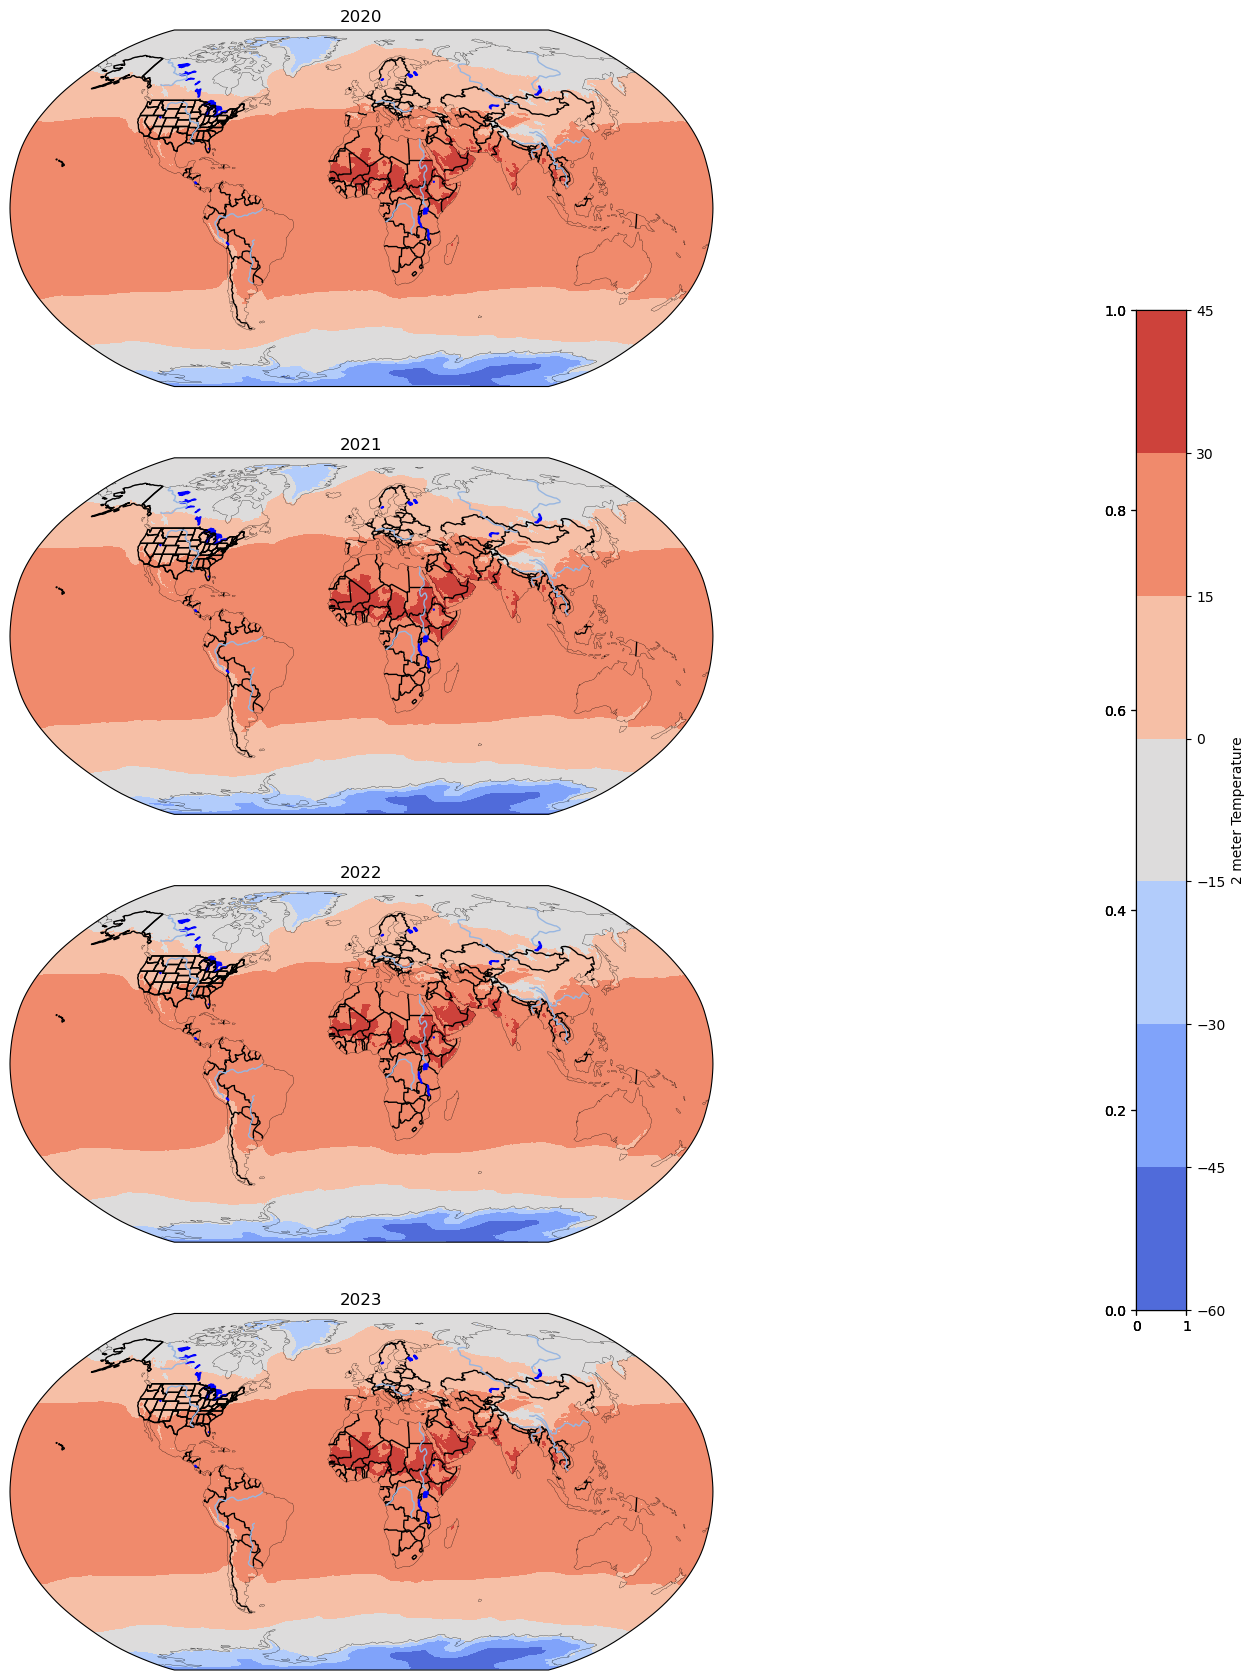

In [5]:
fig,ax=plt.subplots(4,1,figsize=(20,20),subplot_kw={'projection': ccrs.Robinson()})

ax=ax.flatten()

years=["2020", "2021", "2022", "2023"]

for i in range(0,4):
    ax[i].set_title(years[i])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.STATES)
    ax[i].add_feature(cfeature.RIVERS)
    x=ax[i].contourf(celcuis_temp_year.longitude, celcuis_temp_year.latitude, celcuis_temp_year[i], cmap='coolwarm',transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.9,0.29,0.025,0.5])
    
fig.colorbar(x,cax=color_bar,label='2 meter Temperature')
fig.subplots_adjust(wspace=0.55, top=0.93)

# <span style="font-size:19pt">Global 2m Temperature Variation from 2020 to 2023</span>

## 2020
- **Temperature Range:** Temperatures varied widely across the globe, with equatorial regions showing temperatures generally above 25°C.
- **Characteristics:** The global temperature map for 2020 shows warmer temperatures in the Northern Hemisphere and cooler temperatures in the Southern Hemisphere. Africa, particularly the Sahara and Sahel regions, experienced high temperatures exceeding 30°C. North America, Europe, and Asia also saw warmer conditions, especially during the summer months.

## 2021
- **Temperature Range:** Similar to 2020, with temperatures remaining high in equatorial and tropical regions.
- **Characteristics:** The Northern Hemisphere continued to experience higher temperatures. Significant warming is observed across North America, Europe, and Asia. The Sahara and Sahel regions in Africa remained very hot, with temperatures frequently exceeding 30°C. There was a slight increase in temperature anomalies compared to 2020.

## 2022
- **Temperature Range:** Continued high temperatures in equatorial regions with a slight increase in global average temperatures.
- **Characteristics:** The warming trend persisted, with North America, Europe, and Asia experiencing warmer than average conditions. Africa's Sahara and Sahel regions continued to be extremely hot. The Southern Hemisphere also saw some warming, but less pronounced than the Northern Hemisphere.

## 2023
- **Temperature Range:** Similar high temperatures in equatorial regions with further increases in global average temperatures.
- **Characteristics:** The temperature map for 2023 indicates a continued warming trend. The Northern Hemisphere shows significant warming across North America, Europe, and Asia. The Sahara and Sahel regions in Africa remained extremely hot, with persistent high temperatures. The Southern Hemisphere experienced more moderate warming.


# Selecting Ghana From the Global Map Data to Display its 2-meter Temperature From 2020 - 2023

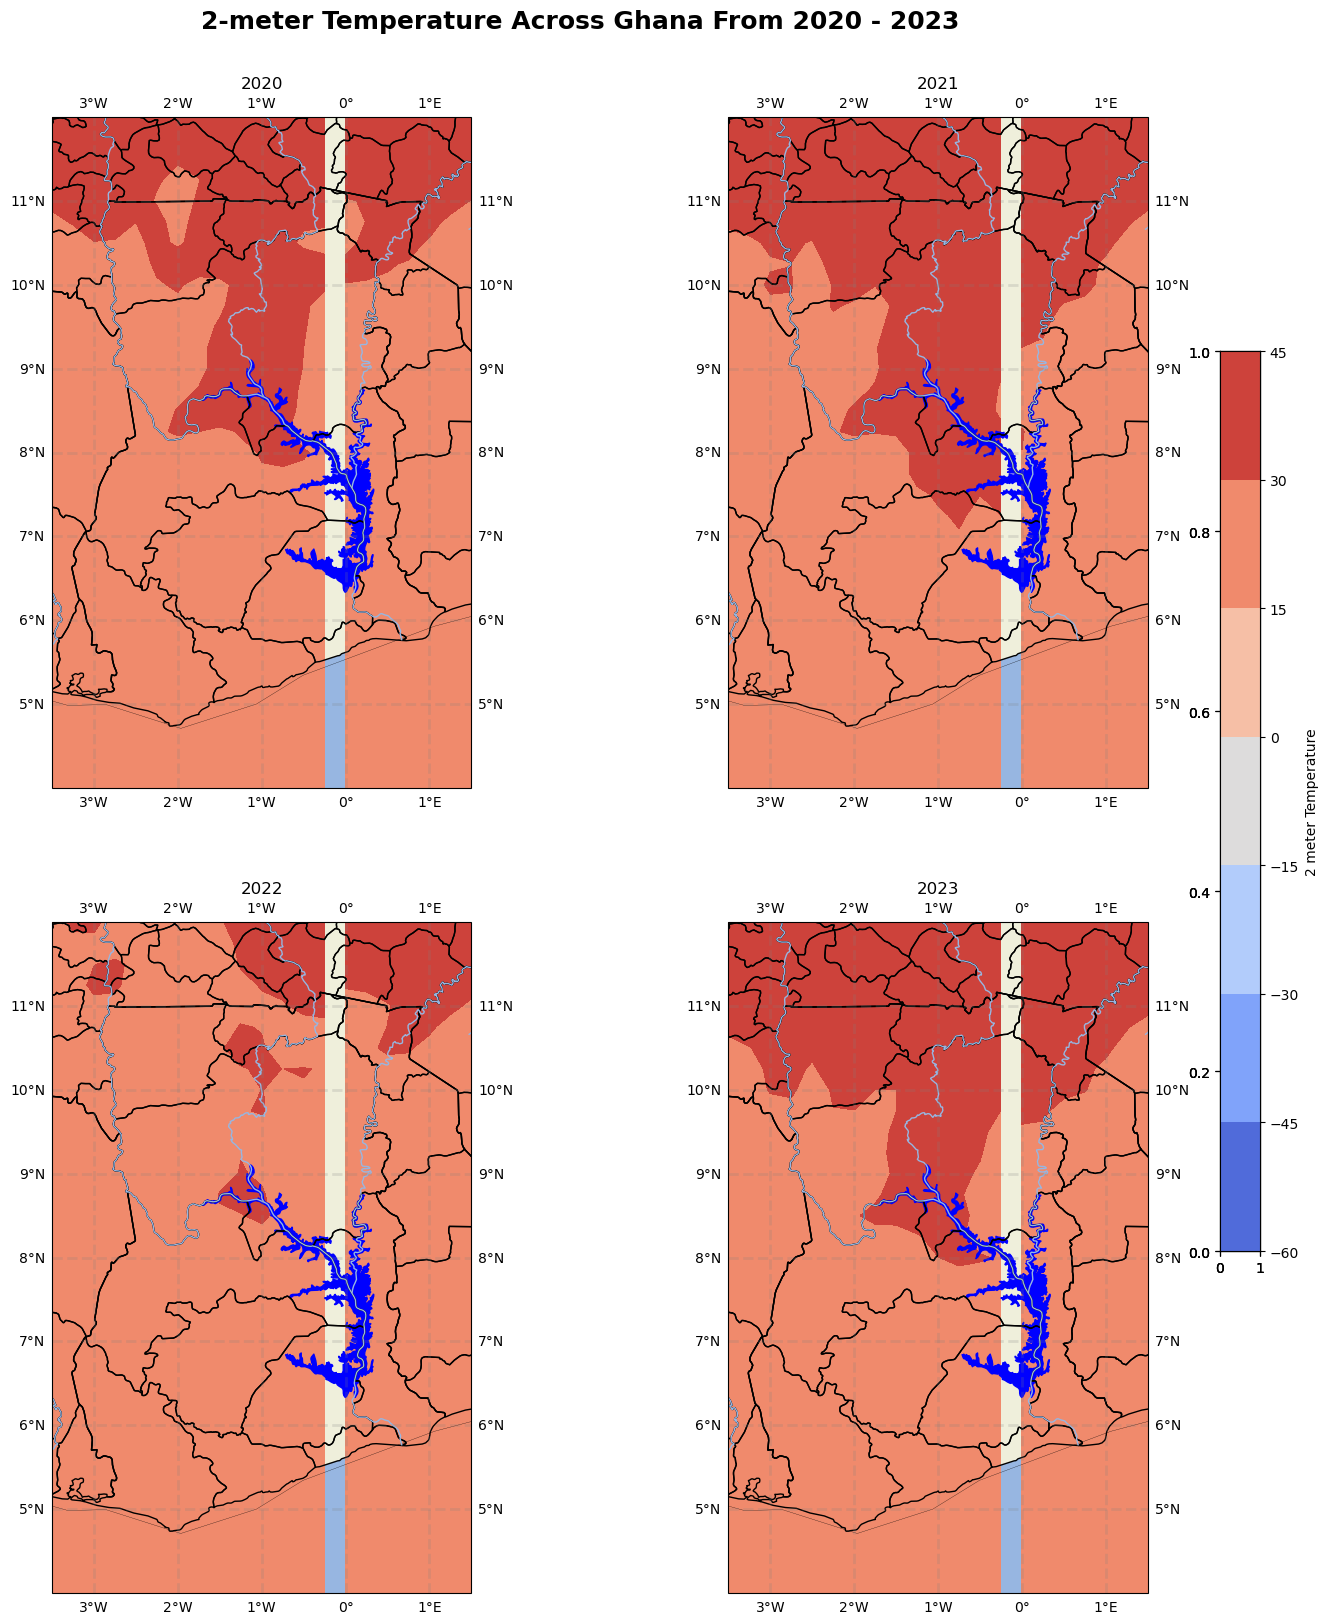

In [6]:
fig,ax=plt.subplots(2,2,figsize=(16,18),subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()

years=["2020", "2021", "2022", "2023"]

for i in range(0,4):
    ax[i].set_title(years[i])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.STATES)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-3.5,1.5,4,12])
    x=ax[i].contourf(celcuis_temp_year.longitude, celcuis_temp_year.latitude, celcuis_temp_year[i], cmap='coolwarm',transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.9,0.29,0.025,0.5])
    gl = ax[i].gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.2, linestyle='--')

plt.suptitle('2-meter Temperature Across Ghana From 2020 - 2023',ha = 'center',fontsize = 18, weight = 'bold')
fig.colorbar(x,cax=color_bar,label='2 meter Temperature')
fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.92, wspace=0.2, hspace=0.2)

# <span style="font-size:19pt">Analysis of 2m Temperature Variation of Ghana from 2020 to 2023</span>

## Northern Ghana

### 2020
- **Temperature Range:** Approximately 25°C to 35°C (77°F to 95°F)
- **Characteristics:** The northern regions experienced high temperatures, particularly during the dry season, which are characteristic of the Sahelian climate zone. There were hotter spots indicating areas where temperatures frequently exceeded 35°C.

### 2021
- **Temperature Range:** Approximately 26°C to 36°C (79°F to 97°F)
- **Characteristics:** The temperatures slightly increased compared to 2020. The northern regions continued to experience very high temperatures, with more extensive areas showing temperatures above 35°C, reflecting intense dry season conditions.

### 2022
- **Temperature Range:** Approximately 26°C to 36°C (79°F to 97°F)
- **Characteristics:** Similar to 2021, the northern regions saw consistent high temperatures. There was a notable persistence of high temperatures throughout the year, with significant portions of the area remaining above 35°C.

### 2023
- **Temperature Range:** Approximately 27°C to 37°C (81°F to 99°F)
- **Characteristics:** There was a noticeable increase in temperatures in the northern regions, especially during the dry season. The year 2023 showed the highest recorded temperatures in this period, with more widespread areas experiencing temperatures above 35°C.

## Southern Ghana

### 2020
- **Temperature Range:** Approximately 24°C to 30°C (75°F to 86°F)
- **Characteristics:** The southern regions experienced moderate temperatures influenced by coastal and forest climates. The temperatures were relatively stable with less extreme variations compared to the north.

### 2021
- **Temperature Range:** Approximately 25°C to 31°C (77°F to 88°F)
- **Characteristics:** There was a slight increase in temperatures. The southern regions remained cooler compared to the northern regions, with temperatures rarely exceeding 31°C. The wet season brought cooler temperatures and higher humidity.

### 2022
- **Temperature Range:** Approximately 25°C to 31°C (77°F to 88°F)
- **Characteristics:** The temperature patterns were similar to 2021. The southern regions continued to experience moderate temperatures, with significant rainfall during the wet season contributing to cooler conditions.

### 2023
- **Temperature Range:** Approximately 26°C to 32°C (79°F to 90°F)
- **Characteristics:** There was a slight increase in temperatures in the southern regions, especially during the dry season. The temperatures remained relatively moderate compared to the north, with the coastal influence helping to keep the temperatures stable.


# Grouping by month and Finding the mean of the data

In [7]:
celcuis_temp_month=selected_temp_data.groupby('time.month').mean()-273
celcuis_temp_month

<xarray.DataArray 't2m' (month: 12, latitude: 721, longitude: 1440)>
array([[[-24.32991  , -24.32991  , -24.32991  , ..., -24.32991  ,
         -24.32991  , -24.32991  ],
        [-24.039108 , -24.039185 , -24.03946  , ..., -24.038208 ,
         -24.038666 , -24.038864 ],
        [-23.817917 , -23.818283 , -23.818558 , ..., -23.81668  ,
         -23.816849 , -23.817307 ],
        ...,
        [-28.09282  , -28.093552 , -28.093994 , ..., -28.090042 ,
         -28.090652 , -28.091553 ],
        [-28.260056 , -28.260406 , -28.260895 , ..., -28.259247 ,
         -28.25943  , -28.259796 ],
        [-28.51773  , -28.51773  , -28.51773  , ..., -28.51773  ,
         -28.51773  , -28.51773  ]],

       [[-24.229706 , -24.229706 , -24.229706 , ..., -24.229706 ,
         -24.229706 , -24.229706 ],
        [-24.097778 , -24.096848 , -24.09578  , ..., -24.101349 ,
         -24.09993  , -24.099121 ],
        [-23.969559 , -23.967804 , -23.96524  , ..., -23.976608 ,
         -23.974365 , -23.972214 ],
...
        [-34.890778 , -34.89148  , -34.891556 , ..., -34.888702 ,
         -34.889236 , -34.889847 ],
        [-34.940094 , -34.9404   , -34.940674 , ..., -34.939667 ,
         -34.93994  , -34.940018 ],
        [-35.276978 , -35.276978 , -35.276978 , ..., -35.276978 ,
         -35.276978 , -35.276978 ]],

       [[-21.846039 , -21.846039 , -21.846039 , ..., -21.846039 ,
         -21.846039 , -21.846039 ],
        [-21.714554 , -21.71402  , -21.712845 , ..., -21.716873 ,
         -21.716019 , -21.71518  ],
        [-21.562546 , -21.56108  , -21.559662 , ..., -21.568207 ,
         -21.566925 , -21.56491  ],
        ...,
        [-26.59668  , -26.598389 , -26.599396 , ..., -26.592972 ,
         -26.593903 , -26.595245 ],
        [-26.679535 , -26.679886 , -26.680786 , ..., -26.677292 ,
         -26.678223 , -26.678833 ],
        [-26.932037 , -26.932037 , -26.932037 , ..., -26.932037 ,
         -26.932037 , -26.932037 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

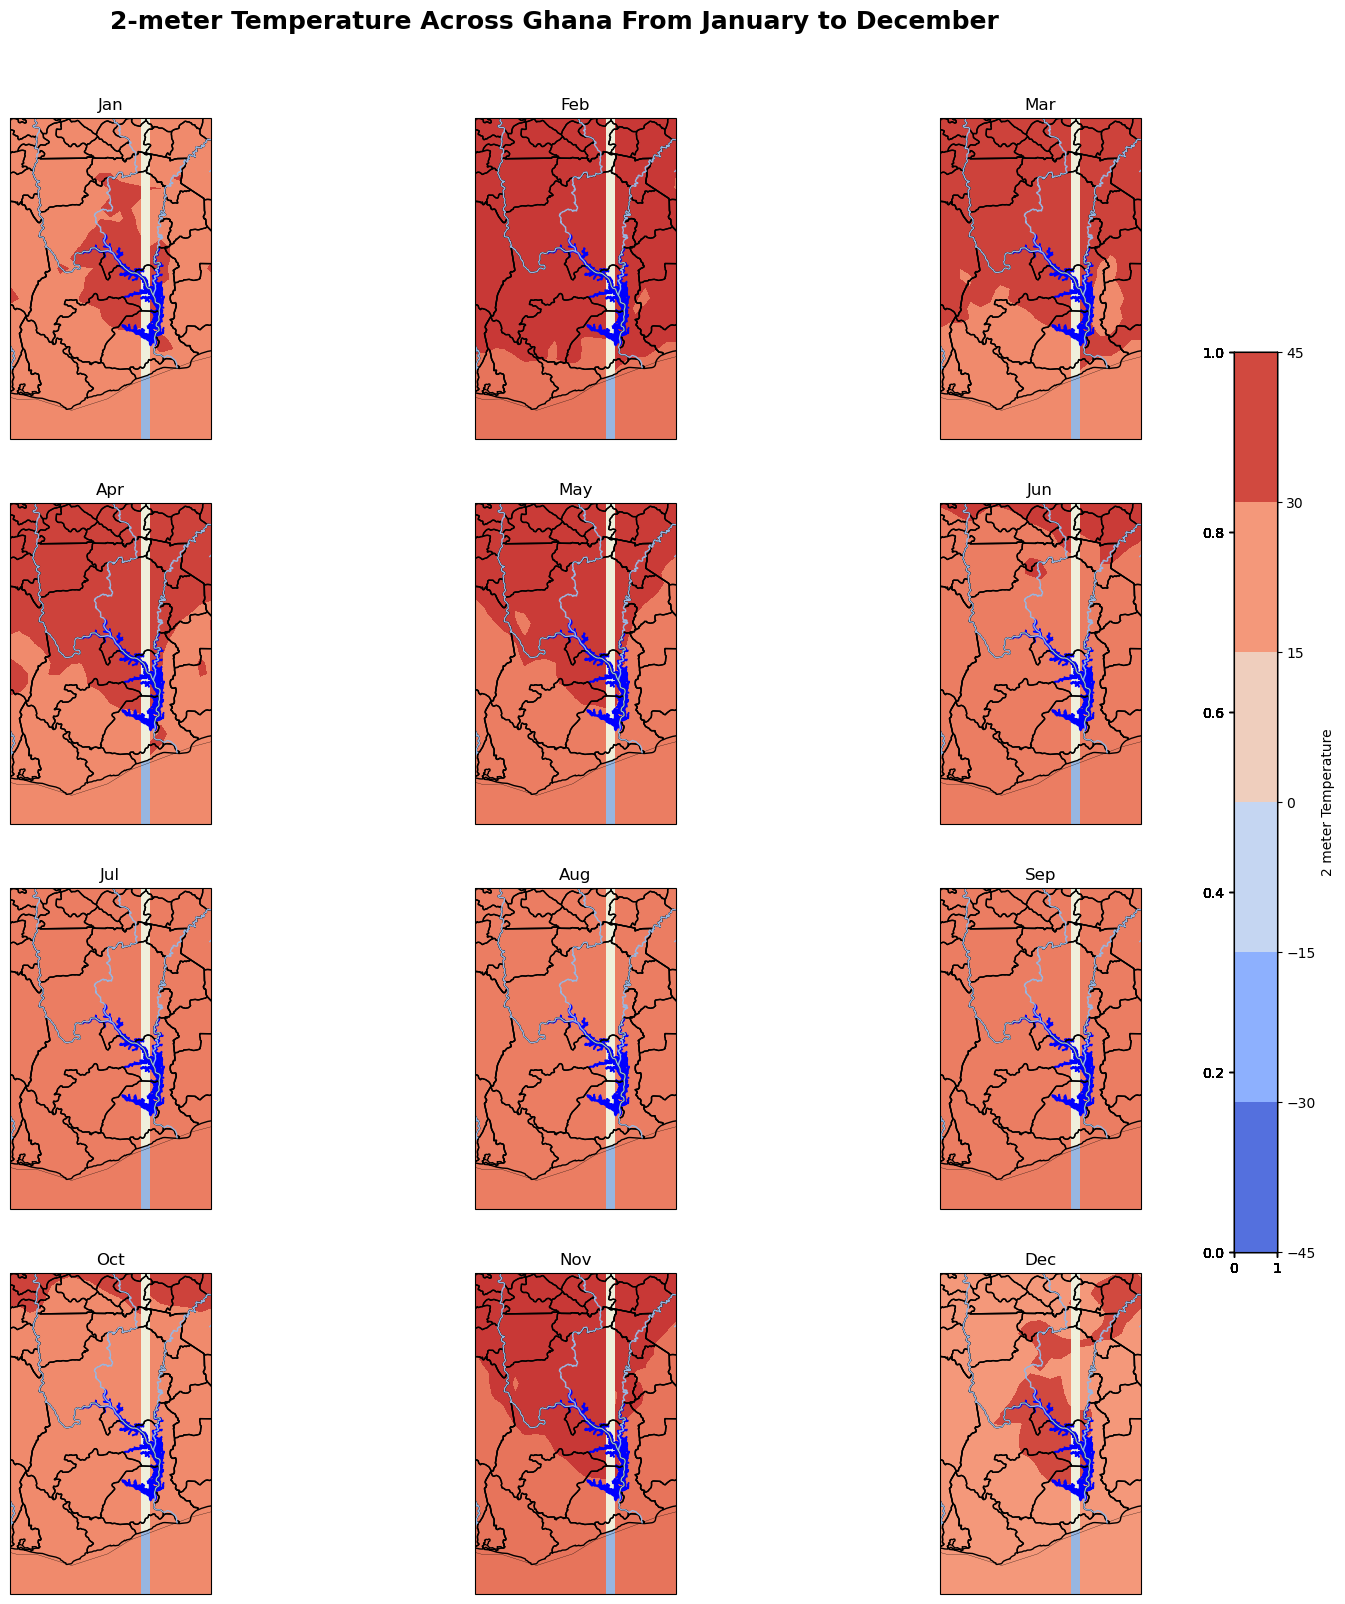

In [8]:
fig,ax=plt.subplots(4,3,figsize=(17,18),subplot_kw={'projection': ccrs.PlateCarree()})

ax=ax.flatten()

month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for i in range(0,12):
    ax[i].set_title(month_names[i])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.STATES)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-3.5,1.5,4,12])
    x=ax[i].contourf(celcuis_temp_month.longitude, celcuis_temp_month.latitude, celcuis_temp_month[i], cmap='coolwarm',transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.9,0.29,0.025,0.5])

plt.suptitle('2-meter Temperature Across Ghana From January to December',ha = 'center',fontsize = 18, weight = 'bold')
fig.colorbar(x,cax=color_bar,label='2 meter Temperature')
fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.92, wspace=0.2, hspace=0.2)

# <span style="font-size:19pt">2m Temperature Variation of Ghana with Respect to Months</span>

## January
- **Temperature:** 26°C to 33°C (79°F to 91°F)
- **Characteristics:** Generally dry, influenced by the harmattan winds bringing dusty and dry conditions.

## February
- **Temperature:** 27°C to 34°C (81°F to 93°F)
- **Characteristics:** One of the hottest months, with dry conditions continuing due to the harmattan winds.

## March
- **Temperature:** 27°C to 34°C (81°F to 93°F)
- **Characteristics:** High temperatures persist, with the beginning of a gradual increase in humidity.

## April
- **Temperature:** 26°C to 32°C (79°F to 90°F)
- **Characteristics:** Start of the wet season, with increasing rainfall and humidity.

## May
- **Temperature:** 25°C to 31°C (77°F to 88°F)
- **Characteristics:** More pronounced rainfall, high humidity, and frequent thunderstorms.

## June
- **Temperature:** 24°C to 30°C (75°F to 86°F)
- **Characteristics:** Peak of the wet season, with heavy rainfall and high humidity.

## July
- **Temperature:** 23°C to 29°C (73°F to 84°F)
- **Characteristics:** Continued heavy rainfall, especially in the southern regions. Temperatures slightly lower due to cloud cover.

## August
- **Temperature:** 23°C to 29°C (73°F to 84°F)
- **Characteristics:** Persistent wet conditions with high humidity and frequent rains.

## September
- **Temperature:** 24°C to 30°C (75°F to 86°F)
- **Characteristics:** Gradual decrease in rainfall, but still humid and warm.

## October
- **Temperature:** 25°C to 31°C (77°F to 88°F)
- **Characteristics:** End of the wet season, with reduced rainfall and humidity starting to decrease.

## November
- **Temperature:** 26°C to 32°C (79°F to 90°F)
- **Characteristics:** Start of the dry season, with temperatures rising and humidity dropping. Harmattan winds begin to influence the weather.

## December
- **Temperature:** 26°C to 33°C (79°F to 91°F)
- **Characteristics:** Dry season in full swing, characterized by harmattan winds bringing dry and dusty conditions.


# Grouping by season and Finding the mean of the data

In [9]:
celcuis_temp_season=selected_temp_data.groupby('time.season').mean()-273
celcuis_temp_season

<xarray.DataArray 't2m' (season: 4, latitude: 721, longitude: 1440)>
array([[[-23.468567  , -23.468567  , -23.468567  , ..., -23.468567  ,
         -23.468567  , -23.468567  ],
        [-23.283844  , -23.283371  , -23.282715  , ..., -23.285446  ,
         -23.284866  , -23.284409  ],
        [-23.1167    , -23.115753  , -23.114471  , ..., -23.120499  ,
         -23.119385  , -23.118134  ],
        ...,
        [-31.119812  , -31.120316  , -31.120224  , ..., -31.1185    ,
         -31.118622  , -31.119171  ],
        [-31.224426  , -31.224396  , -31.224335  , ..., -31.223969  ,
         -31.224121  , -31.22435   ],
        [-31.486786  , -31.486786  , -31.486786  , ..., -31.486786  ,
         -31.486786  , -31.486786  ]],

       [[  0.5338135 ,   0.5338135 ,   0.5338135 , ...,   0.5338135 ,
           0.5338135 ,   0.5338135 ],
        [  0.52734375,   0.5274353 ,   0.5274658 , ...,   0.5275574 ,
           0.5276184 ,   0.5276184 ],
        [  0.5307617 ,   0.5310364 ,   0.5310974 , ...,   0.5312805 ,
           0.53115845,   0.5309448 ],
...
        [-49.541794  , -49.54068   , -49.538788  , ..., -49.54448   ,
         -49.542816  , -49.54193   ],
        [-49.593155  , -49.591614  , -49.59024   , ..., -49.59529   ,
         -49.59459   , -49.593918  ],
        [-50.093353  , -50.093353  , -50.093353  , ..., -50.093353  ,
         -50.093353  , -50.093353  ]],

       [[-11.685516  , -11.685516  , -11.685516  , ..., -11.685516  ,
         -11.685516  , -11.685516  ],
        [-11.731201  , -11.730713  , -11.730316  , ..., -11.732666  ,
         -11.732147  , -11.731812  ],
        [-11.723175  , -11.7222595 , -11.721405  , ..., -11.726471  ,
         -11.725464  , -11.724335  ],
        ...,
        [-45.68141   , -45.680344  , -45.677734  , ..., -45.685135  ,
         -45.683365  , -45.681946  ],
        [-45.71245   , -45.710983  , -45.70929   , ..., -45.7153    ,
         -45.714355  , -45.71344   ],
        [-46.233566  , -46.233566  , -46.233566  , ..., -46.233566  ,
         -46.233566  , -46.233566  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

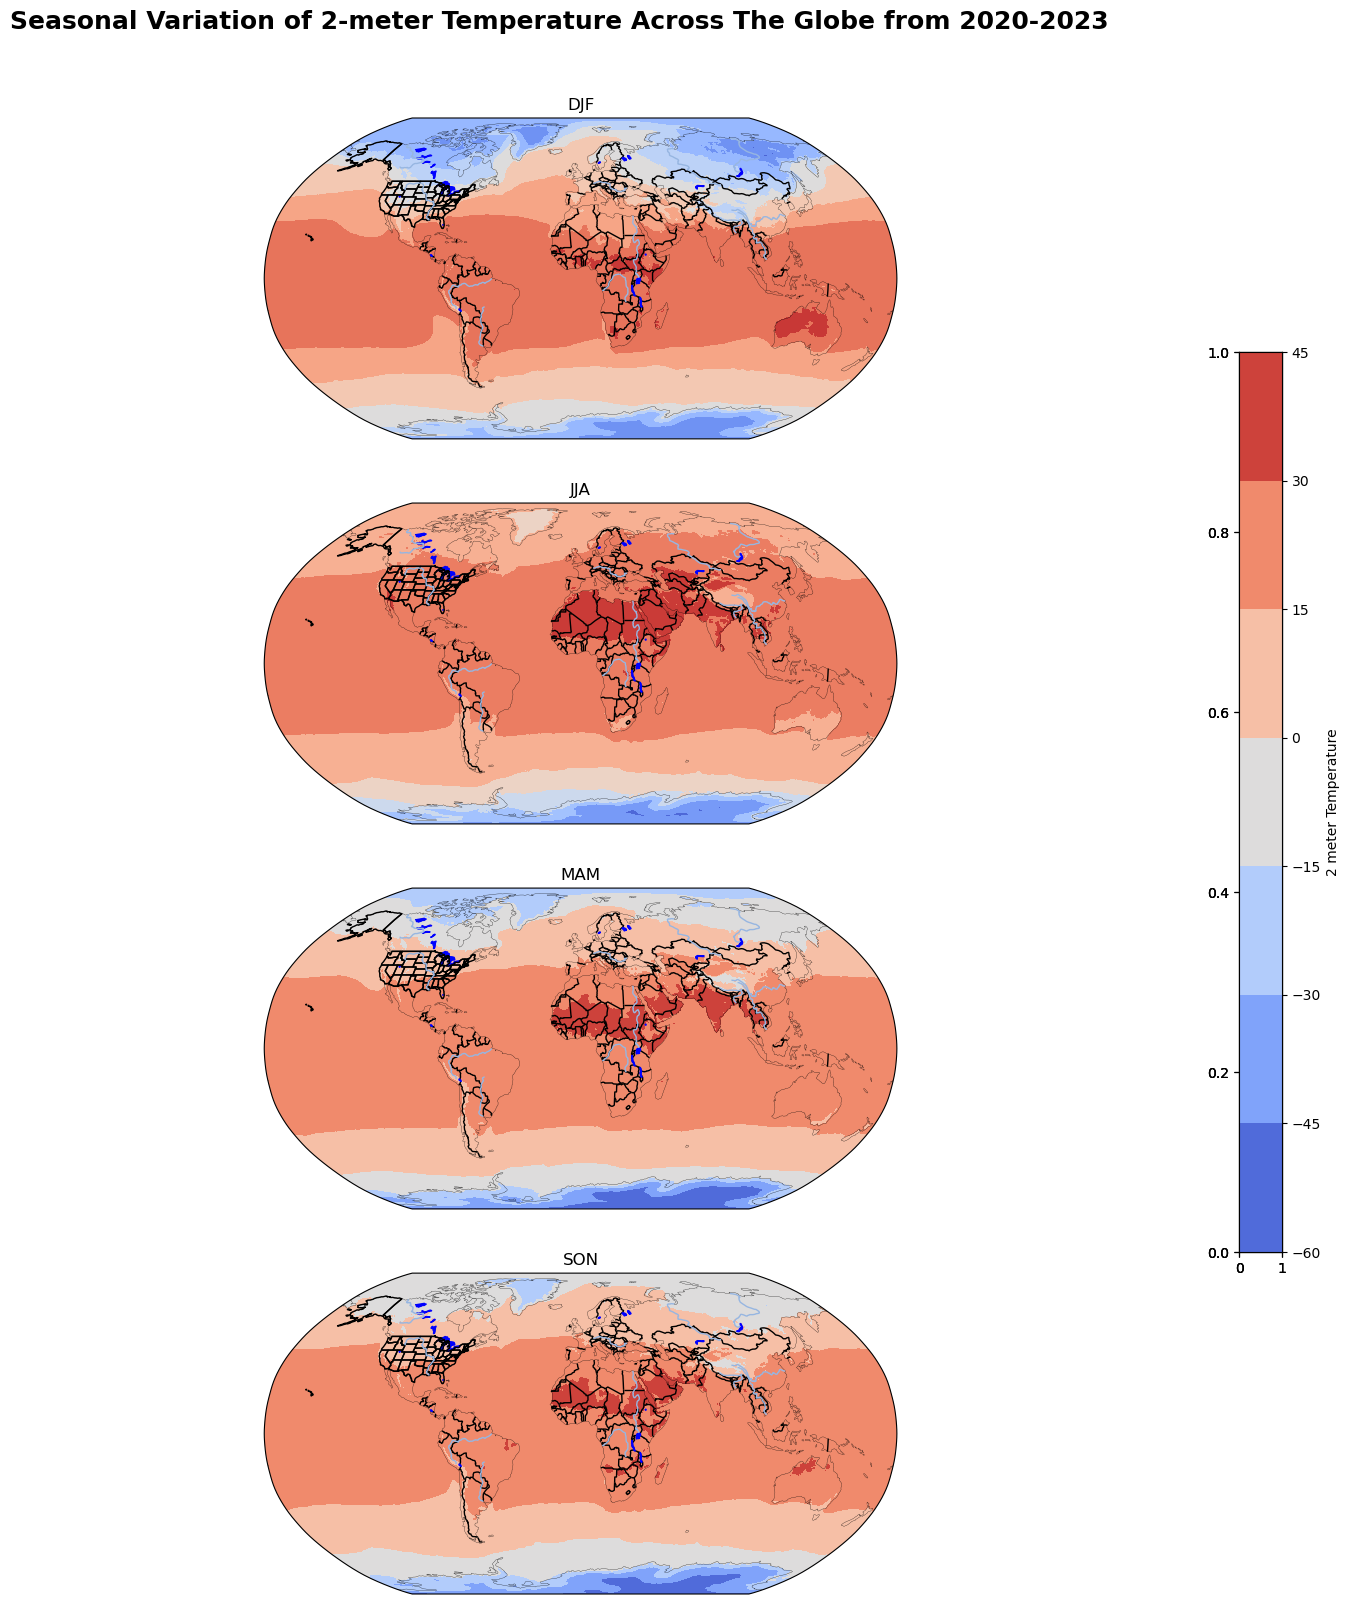

In [10]:
fig,ax=plt.subplots(4,1,figsize=(17,18),subplot_kw={'projection': ccrs.Robinson()})

ax=ax.flatten()

season_names=['DJF', 'JJA', 'MAM', 'SON']

for i in range(0,4):
    ax[i].set_title(season_names[i])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.STATES)
    ax[i].add_feature(cfeature.RIVERS)
    x=ax[i].contourf(celcuis_temp_season.longitude, celcuis_temp_season.latitude, celcuis_temp_season[i], cmap='coolwarm',transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.9,0.29,0.025,0.5])
    
plt.suptitle('Seasonal Variation of 2-meter Temperature Across The Globe from 2020-2023',ha = 'center',fontsize = 18, weight = 'bold')
fig.colorbar(x,cax=color_bar,label='2 meter Temperature')
fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.92, wspace=0.2, hspace=0.2)

<b><span style="font-size:19pt">Seasonal Analysis of 2m temperature data of the world</span>

:

## Winter (December to February)
- **Northern Hemisphere:** Temperatures drop significantly, especially in higher latitudes. Regions such as North America, Europe, and Asia experience cold temperatures, often below freezing, with the coldest areas being Siberia, northern Canada, and Scandinavia.
- **Southern Hemisphere:** It is summer during this period. Countries like Australia, South Africa, and parts of South America experience warm to hot temperatures.

## Spring (March to May)
- **Northern Hemisphere:** Temperatures start to warm up as the sun's rays become more direct. Snow begins to melt, and regions like the United States, Europe, and Asia experience milder and gradually warmer temperatures.
- **Southern Hemisphere:** Transitioning to autumn, temperatures begin to cool down. Areas that were very hot in summer start experiencing milder conditions.

## Summer (June to August)
- **Northern Hemisphere:** This is the warmest period. Regions such as North America, Europe, and Asia see high temperatures, often exceeding 30°C (86°F) in many areas. The hottest places can experience temperatures above 40°C (104°F).
- **Southern Hemisphere:** It is winter. Areas like Australia, South Africa, and southern parts of South America experience cooler temperatures, but generally milder compared to Northern Hemisphere winters.

## Autumn (September to November)
- **Northern Hemisphere:** Temperatures start to decrease as the sun's direct rays move southward. The cooling is gradual, with regions experiencing pleasant temperatures before moving into the cold of winter.
- **Southern Hemisphere:** Temperatures begin to rise again as they transition to spring. Regions that were cooler in winter start warming up.

## Global Trends
- **Tropics:** The equatorial regions experience relatively small temperature variations throughout the year, with consistently warm temperatures.
- **Polar Regions:** Experience the most extreme seasonal temperature changes. The Arctic and Antarctic see temperatures swing from extremely cold in their respective winters to milder (though still cold) conditions in their summers.
- **Ocean Influence:** Coastal areas tend to have more moderate temperature variations due to the oto the larger landmasses.e.

# Seasonal Variation of Ghana From 2020 - 2023

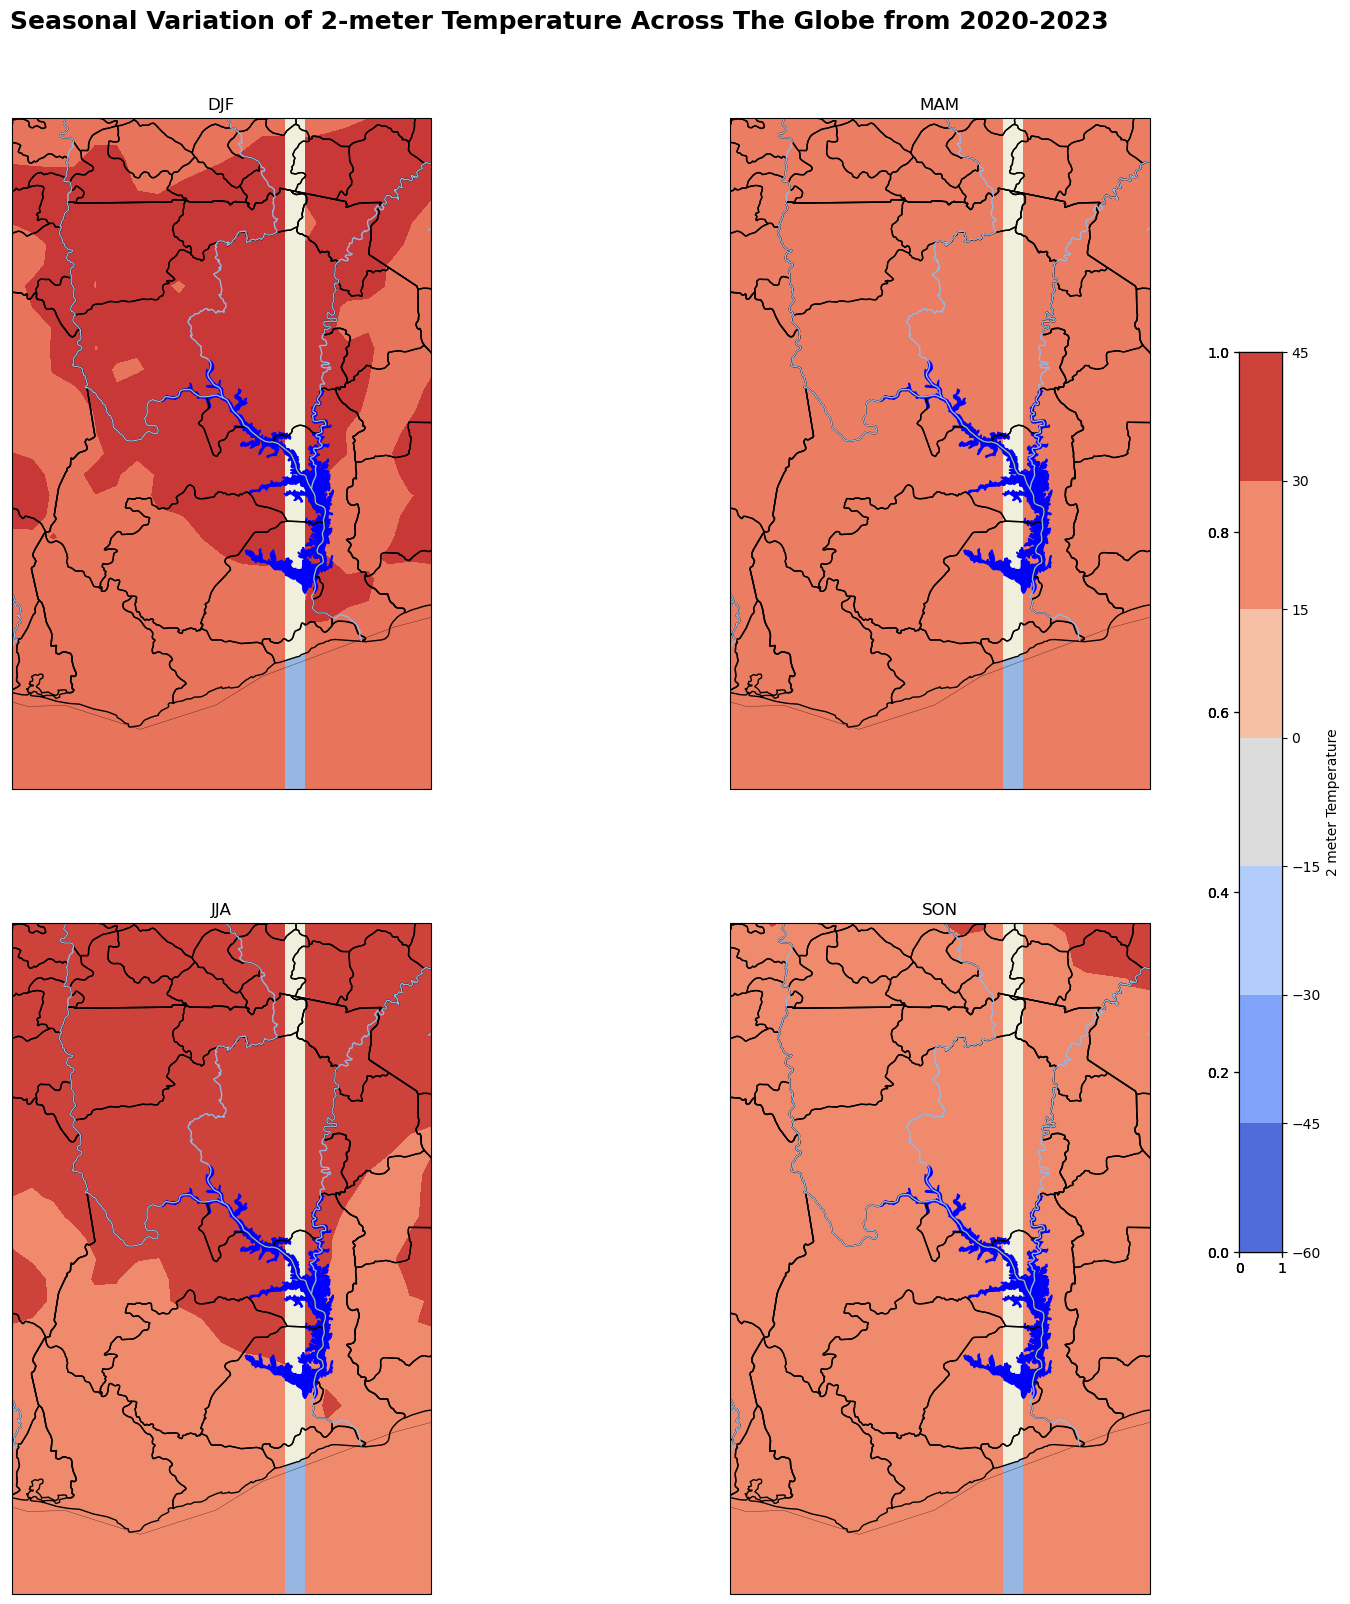

In [11]:
fig,ax=plt.subplots(2,2,figsize=(17,18),subplot_kw={'projection': ccrs.PlateCarree()})

ax=ax.flatten()

season_names=['DJF', 'MAM','JJA', 'SON']

for i in range(0,4):
    ax[i].set_title(season_names[i])
    ax[i].add_feature(cfeature.BORDERS)
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.STATES)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-3.5,1.5,4,12])
    x=ax[i].contourf(celcuis_temp_season.longitude, celcuis_temp_season.latitude, celcuis_temp_season[i], cmap='coolwarm',transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.9,0.29,0.025,0.5])
    
plt.suptitle('Seasonal Variation of 2-meter Temperature Across The Globe from 2020-2023',ha = 'center',fontsize = 18, weight = 'bold')
fig.colorbar(x,cax=color_bar,label='2 meter Temperature')
fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.92, wspace=0.2, hspace=0.2)

# <b><span style="font-size:19pt">Seasonal Analysis of Ghana</span>

Ghana, located in West Africa, experiences a tropical climate with two main seasons: the wet season and the dry season.

## Wet Season (April to October)
- **Temperature:** During the wet season, temperatures in Ghana typically range from 24°C to 30°C (75°F to 86°F).
- **Characteristics:** The wet season is marked by heavy rainfall, high humidity, and frequent thunderstorms. The southern parts of the country, including Accra, experience more pronounced rainy seasons, while the northern regions have slightly shorter wet periods.

## Dry Season (November to March)
- **Temperature:** The dry season sees higher temperatures, ranging from 27°C to 35°C (81°F to 95°F). The hottest months are usually February and March.
- **Characteristics:** This season is marked by the harmattan winds, which blow from the Sahara Desert, bringing dry and dusty conditions. The weather is generally clear with lower humidity.


# Reasons for Global Variation of 2m Temperature 

The temperature difference from the pole to the equator depends on the Sun's energy and the energy retained in Earth's systems. There have been times when the Earth didn't have polar ice caps or deserts and there have been times when ice buried much of the Earth's surface.

One of the most common misconceptions is that the regions at or near the equator are hotter than the poles because the equator is closer to the sun than other areas of the earth. Linked to this misconception is another misconception that Earth’s seasons are as a result of the distance of the Earth from the sun. However, the sun is so far away from the earth that it shines almost equally at the poles and equator. If the sun shines equally in almost all areas, why are regions around the equator hotter than areas around the poles? Below is an explanation of why equatorial regions are very hot, including direct vs indirect sunshine, the reflection of sunrays, and atmospheric differences.

<B><big>Factors that causes the 2m temperature variation at the surface of the earth

<li><b>The Amount Of Sunshine Received At The Equator</b>

While the sun shines almost equally in all parts of the earth, the equator is exposed to a high amount of direct sunlight than the poles. While the sun is directly overhead at the equator, it is slightly slanted at the poles. The earth is tilted 23.5 degrees on its axis and remains tilted throughout the year. Half the year the northern hemisphere is tilted away from the sun while the southern hemisphere is tilted towards the sun and vice versa in the other half of the year. Thus, the polar regions spend half the year pointed away from the sun. Thus, the sun rays cover a large area due to the tilt and also do not hit all the areas with the same angle and intensity. While the sun rays hit the poles at an angle, the same amount of sun rays hit the equator regions more directly and in a more concentrated manner.

So, if the same amount of light rays fall on two different surfaces. On one surface, the light rays are directly overhead and concentrated in a specific area while on the other surface the light rays reach the surface from a slightly slanted angle and spread over a larger area. The effect is that the area that directly receives light rays over a small area is likely to be hotter than the surface that receives light “indirectly” over a large area. The area that receives direct light rays is the equator while the other surface that receives light rays “indirectly” is the polar region.


<li><b>Reflection Of The Sun’s Rays On The Earth’s Surface</b>

When the sun’s rays reach the earth, some of it is reflected back to the atmosphere and does not get to warm the area. The amount of rays reflected depend on the nature of the surface. Areas with snow reflect back up to 95% of the incoming sunshine. Regions around the equator absorb a lot of sun rays leading to warmer conditions, unlike the polar regions (the Arctic and Antarctica) which reflect a lot of sun rays due to the massive snow.


<li><b>Difference In Atmosphere</b>
    
The amount of sunlight absorbed and scattered while passing through the atmosphere depend on the nature and concentration of air molecules in the atmosphere. All other factors held constant, the sun’s path is longer in a higher latitude. The presence of more air molecules and particles result in greater absorption and scattering of sun rays. Thus, these places on high latitude receive less solar energy.